In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [50]:
from datetime import datetime
####IMPORT EXO##
custom_date_parser = lambda x: datetime.strptime(x, "%d/%m/%Y")
tiie = pd.read_csv("./../data/TIIE.csv",parse_dates = ["Fecha"],date_parser = custom_date_parser)
tiie.set_index("Fecha",inplace=True)
tiie = tiie.sort_index()

#total data_set
idx = pd.date_range('2000-01-01', periods=tipo_cambio.shape[0], freq='SMS')
tiie.index = pd.DatetimeIndex(tiie.index)
tiie = tiie.reindex(idx,fill_value = np.NaN)
tiie = tiie.interpolate()
print(tiie)
confianza = pd.read_csv("./../data/confianza.csv",parse_dates = ["Fecha"],date_parser = custom_date_parser)
confianza.set_index("Fecha",inplace=True)
confianza = confianza.sort_index()

#total data_set
idx = pd.date_range('2000-01-01', periods=tipo_cambio.shape[0], freq='SMS')
confianza.index = pd.DatetimeIndex(confianza.index)
confianza = confianza.reindex(idx,fill_value = np.NaN)
confianza = confianza.interpolate()
print(confianza)
custom_date_parser = lambda x: datetime.strptime(x, "%d/%m/%Y")

tipo_cambio = pd.read_csv("./../data/tasacambio.csv",parse_dates = ["Fecha"],date_parser = custom_date_parser)
tipo_cambio = tipo_cambio.set_index('Fecha')
print(tipo_cambio)

                 TIIE
2000-01-01  18.426667
2000-01-15  18.499167
2000-02-01  18.571667
2000-02-15  17.635278
2000-03-01  16.698889
...               ...
2021-06-01   4.282740
2021-06-15   4.345642
2021-07-01   4.525450
2021-07-15   4.514217
2021-08-01   4.515600

[519 rows x 1 columns]
            confianza_consumidor
2000-01-01                  44.6
2000-01-15                  44.6
2000-02-01                  44.6
2000-02-15                  44.6
2000-03-01                  44.6
...                          ...
2021-06-01                  44.3
2021-06-15                  44.3
2021-07-01                  44.3
2021-07-15                  44.3
2021-08-01                  44.3

[519 rows x 1 columns]
                 Tipo
Fecha                
2000-01-01   9.493350
2000-01-15   9.489450
2000-02-01   9.458150
2000-02-15   9.384200
2000-03-01   9.306000
...               ...
2021-06-01  19.887108
2021-06-15  20.166879
2021-07-01  19.911242
2021-07-15  19.980171
2021-08-01  19.964100

[519 

In [51]:
full_exog = pd.concat([tipo_cambio,tiie,confianza],axis= 1)
print(full_exog)

                 Tipo       TIIE  confianza_consumidor
2000-01-01   9.493350  18.426667                  44.6
2000-01-15   9.489450  18.499167                  44.6
2000-02-01   9.458150  18.571667                  44.6
2000-02-15   9.384200  17.635278                  44.6
2000-03-01   9.306000  16.698889                  44.6
...               ...        ...                   ...
2021-06-01  19.887108   4.282740                  44.3
2021-06-15  20.166879   4.345642                  44.3
2021-07-01  19.911242   4.525450                  44.3
2021-07-15  19.980171   4.514217                  44.3
2021-08-01  19.964100   4.515600                  44.3

[519 rows x 3 columns]


<AxesSubplot:xlabel='Fecha'>

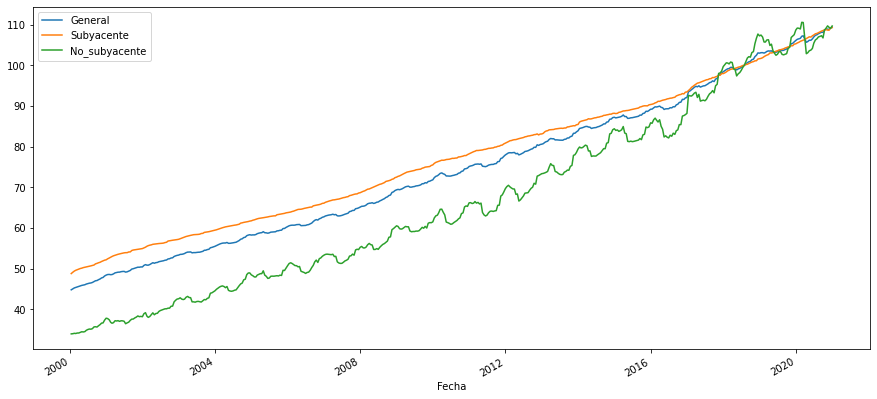

In [3]:
inflation_train = pd.read_csv("./../data/trainset.csv")
inflation_train["Fecha"] = pd.Series(pd.date_range('2000-01-01', periods=inflation_train.shape[0], freq='SM').normalize(), name='Date')
inflation_train.set_index('Fecha')
inflation_train.plot(x="Fecha", figsize=(15, 7))

<AxesSubplot:xlabel='Fecha'>

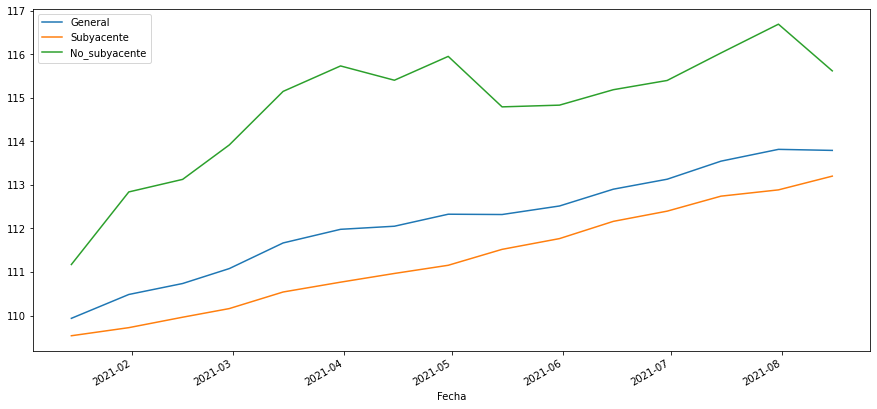

In [4]:
inflation_test = pd.read_csv("./../data/testset.csv")
inflation_test["Fecha"] = pd.Series(pd.date_range('2021-01-01', periods=inflation_train.shape[0], freq='SM').normalize(), name='Date')
inflation_test.set_index('Fecha')
inflation_test.plot(x="Fecha", figsize=(15, 7))

<AxesSubplot:xlabel='Fecha'>

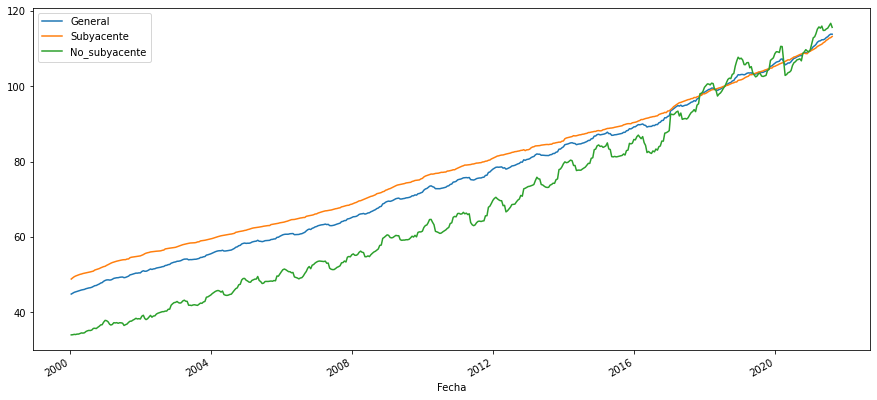

In [5]:
ax=inflation_total_dataset = inflation_train.append(inflation_test, ignore_index=True)
inflation_total_dataset.plot(x="Fecha", figsize=(15, 7))

<AxesSubplot:>

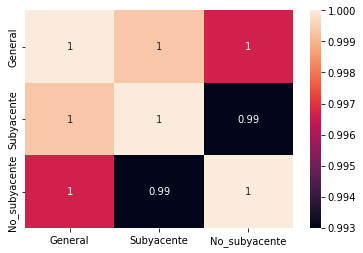

In [6]:
sn.heatmap(inflation_total_dataset.corr(), annot=True)

<AxesSubplot:xlabel='Fecha'>

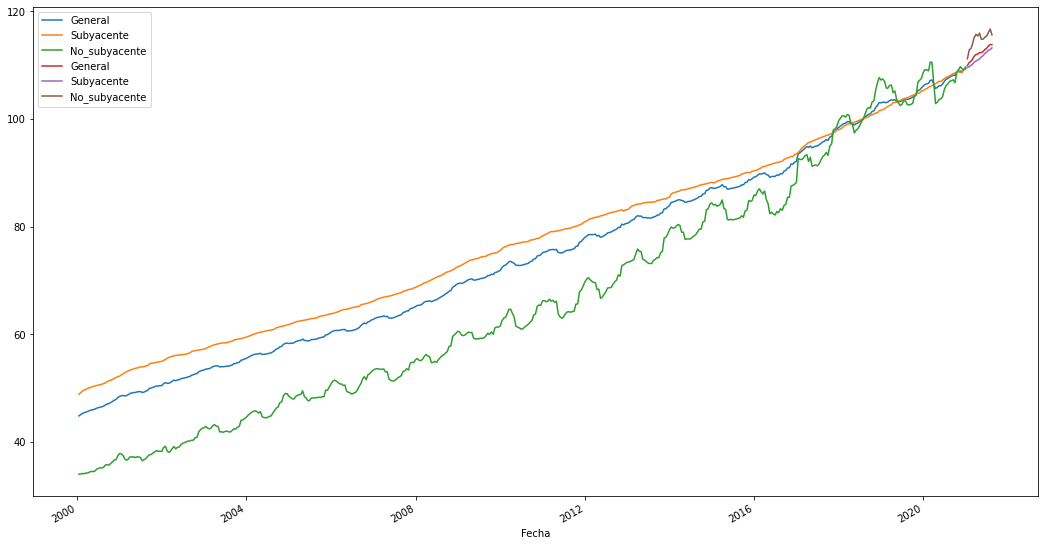

In [7]:
fig, ax = plt.subplots(figsize=(18, 10))
inflation_train.plot(ax=ax, x="Fecha")
inflation_test.plot(ax=ax, x="Fecha")

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.metrics import mean_absolute_error

In [9]:
linear_r_model = ForecasterAutoreg(regressor=LinearRegression(),
  lags=25)
linear_r_model.fit(y=inflation_train["Subyacente"])
predicted = linear_r_model.predict(steps=15)

test = pd.DataFrame(inflation_test["Subyacente"])
test["Predicted"] = predicted
print(test)
print(mean_absolute_error(test["Subyacente"], test["Predicted"]))

    Subyacente   Predicted
0   109.535926  109.505321
1   109.721867  109.691475
2   109.961759  109.876301
3   110.160047  109.987324
4   110.541054  110.226349
5   110.766903  110.343810
6   110.966931  110.579354
7   111.154931  110.710000
8   111.520667  110.950221
9   111.767779  110.999164
10  112.163713  111.236168
11  112.398553  111.423658
12  112.742999  111.660053
13  112.887154  111.802761
14  113.202701  112.029575
0.5647634697081126


<AxesSubplot:>

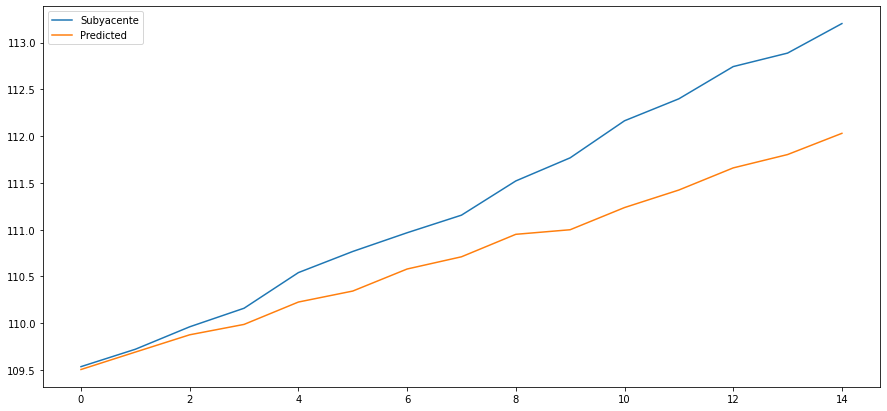

In [10]:
test.plot(figsize=(15, 7))

In [11]:
logistic_r_model = ForecasterAutoreg(regressor=Ridge(),
  lags=25)
logistic_r_model.fit(y=inflation_train["Subyacente"])
predicted = logistic_r_model.predict(steps=15)

test = pd.DataFrame(inflation_test["Subyacente"])
test["Predicted"] = predicted
print(test)
print(mean_absolute_error(test["Subyacente"], test["Predicted"]))

    Subyacente   Predicted
0   109.535926  109.486898
1   109.721867  109.649997
2   109.961759  109.843973
3   110.160047  109.959658
4   110.541054  110.175650
5   110.766903  110.314240
6   110.966931  110.527982
7   111.154931  110.657186
8   111.520667  110.859651
9   111.767779  110.952760
10  112.163713  111.191455
11  112.398553  111.357872
12  112.742999  111.575837
13  112.887154  111.716111
14  113.202701  111.930374
0.619555992849979


<AxesSubplot:>

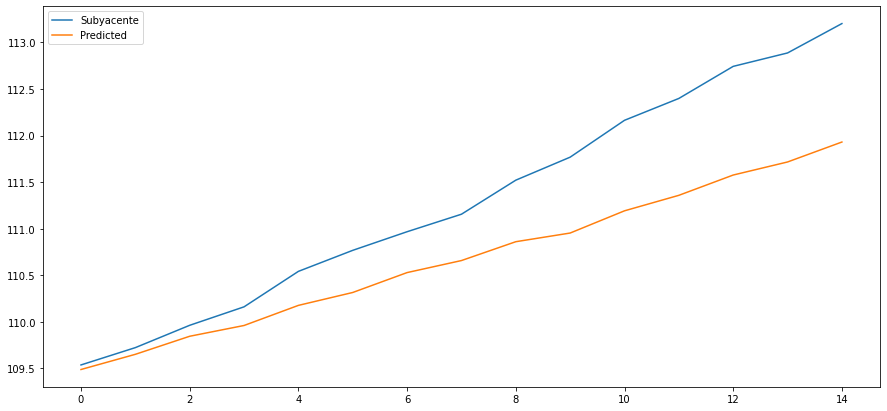

In [12]:
test.plot(figsize=(15, 7))

In [13]:
logistic_r_model = ForecasterAutoreg(regressor=SVR(), lags=30)
logistic_r_model.fit(y=inflation_train["Subyacente"])
predicted = logistic_r_model.predict(steps=15)

test = pd.DataFrame(inflation_test["Subyacente"])
test["Predicted"] = predicted
print(test)
print(mean_absolute_error(test["Subyacente"], test["Predicted"]))

    Subyacente   Predicted
0   109.535926  104.610134
1   109.721867  104.520650
2   109.961759  104.431085
3   110.160047  104.342466
4   110.541054  104.253000
5   110.766903  104.168401
6   110.966931  104.084871
7   111.154931  104.005441
8   111.520667  103.929431
9   111.767779  103.859460
10  112.163713  103.793723
11  112.398553  103.733643
12  112.742999  103.679133
13  112.887154  103.632348
14  113.202701  103.593315
7.25705902459981


In [14]:
import pmdarima as pm
import statsmodels.api as sm

In [15]:
model = pm.auto_arima(inflation_train["Subyacente"], start_p=0, start_q=0)
best_order = model.get_params()['order']
best_seasonal_order = model.get_params()['seasonal_order']
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  504
Model:               SARIMAX(2, 2, 3)   Log Likelihood                 555.516
Date:                Sun, 29 Aug 2021   AIC                          -1099.031
Time:                        10:39:06   BIC                          -1073.720
Sample:                             0   HQIC                         -1089.101
                                - 504                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3074      0.228     -1.350      0.177      -0.754       0.139
ar.L2          0.6916      0.228      3.031      0.002       0.244       1.139
ma.L1         -0.5649      0.250     -2.260      0.024      -1.055      -0.075
ma.L2         -0.9627      0.024    -39.715      0.000      -1.010      -0.915
ma.L3          0.5545      0.239      2.322      0.020       0.086       1.022
sigma2         0.0063      0.000     27.418      0.000       0.006       0.007
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):               640.64
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               2.65   Skew:                             1.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
# exog=tipo_cambio["Tipo"][:-15]
model = sm.tsa.statespace.SARIMAX(inflation_train["Subyacente"], order=best_order, seasonal_order=best_seasonal_order)
model_fit = model.fit(disp=False)

C:\Users\IquiBalam\anaconda3\envs\testenv\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
def forecast_to_df(model, steps):
    #, exog=tipo_cambio["Tipo"][504:]
    forecast = model.get_forecast(steps=steps)
    pred_df = forecast.conf_int()
    pred_df['pred'] = forecast.predicted_mean
    pred_df.columns = ['lower', 'upper', 'pred']
    return pred_df

pred_df = forecast_to_df(model_fit, steps = len(inflation_test["Subyacente"]))

(<Figure size 864x504 with 1 Axes>,
 <AxesSubplot:title={'center':'Model Validation'}>)

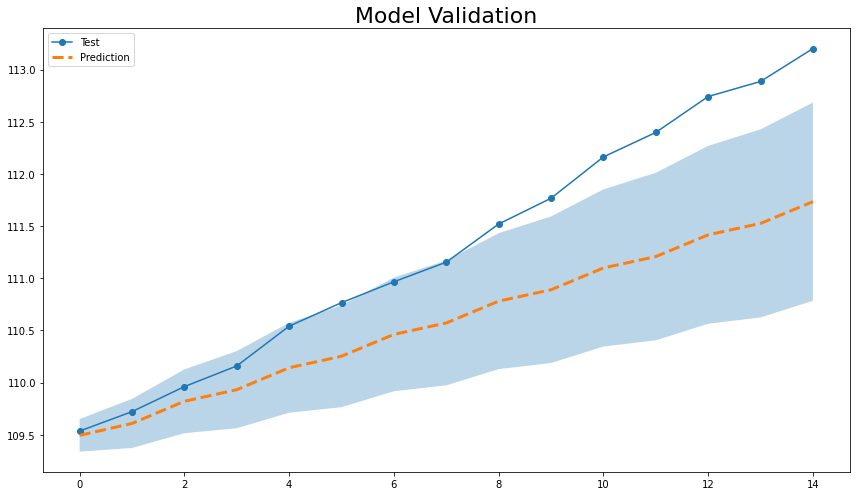

In [18]:
def plot_train_test_pred(test, pred_df):
    fig,ax = plt.subplots(figsize=(12,7))
    kws = dict(marker='o')
    
    ax.plot(test,label='Test',**kws)
    ax.plot(pred_df['pred'],label='Prediction',ls='--',linewidth=3)

    ax.fill_between(x=pred_df.index,y1=pred_df['lower'],y2=pred_df['upper'],alpha=0.3)
    ax.set_title('Model Validation', fontsize=22)
    ax.legend(loc='upper left')
    fig.tight_layout()
    return fig,ax

plot_train_test_pred(inflation_test["Subyacente"], pred_df.reset_index())

In [19]:
print(mean_absolute_error(test["Subyacente"], pred_df["pred"]))

0.7031800398178263


In [22]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

In [23]:
training_set = inflation_train["Subyacente"].values
test_set = inflation_test["Subyacente"].values
training_set = training_set.reshape(1,-1).transpose()
test_set = test_set.reshape(1,-1).transpose()

In [24]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [25]:
X_train = []
y_train = []
for i in range(24, 504):
    X_train.append(training_set_scaled[i-24:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [26]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
15/15 [==============================] - 8s 42ms/step - loss: 0.0908
Epoch 2/100
15/15 [==============================] - 1s 39ms/step - loss: 0.0204
Epoch 3/100
15/15 [==============================] - 1s 36ms/step - loss: 0.0074
Epoch 4/100
15/15 [==============================] - 1s 39ms/step - loss: 0.0042
Epoch 5/100
15/15 [==============================] - 1s 42ms/step - loss: 0.0040
Epoch 6/100
15/15 [==============================] - 1s 37ms/step - loss: 0.0045
Epoch 7/100
15/15 [==============================] - 1s 40ms/step - loss: 0.0040
Epoch 8/100
15/15 [==============================] - 1s 38ms/step - loss: 0.0031
Epoch 9/100
15/15 [==============================] - 1s 37ms/step - loss: 0.0037
Epoch 10/100
15/15 [==============================] - 1s 38ms/step - loss: 0.0029
Epoch 11/100
15/15 [==============================] - 1s 36ms/step - loss: 0.0030
Epoch 12/100
15/15 [==============================] - 1s 45ms/step - loss: 0.0025
Epoch 13/100
15/15 [=====

In [27]:
training_set = inflation_train["Subyacente"]
test_set = inflation_test["Subyacente"]

dataset_total = inflation_total_dataset["Subyacente"]
inputs = dataset_total[len(dataset_total) - len(test_set) - 24:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(24, 504):
    X_test.append(inputs[i-24:i, 0])
X_test = np.array(X_test).reshape(1,-1).transpose()
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(480, 1, 1)


C:\Users\IQUIBA~1\AppData\Local\Temp/ipykernel_18272/3420984919.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  X_test = np.array(X_test).reshape(1,-1).transpose()


In [29]:
predicted_stock_price = model.predict(tf.convert_to_tensor(X_test, dtype=tf.double) )
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

ValueError: setting an array element with a sequence.